In [2]:
import pandas as pd
import numpy as np

In [3]:
X_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/Extracted Features/mne+Xdawn/X.npy")
X_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/Extracted Features/mne+Xdawn/X_test.npy")
Y_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/Extracted Features/mne+Xdawn/Y.npy")
Y_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/Extracted Features/mne+Xdawn/Y_test.npy")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5670, 868), (3780, 868), (5670,), (3780,))

# 1. Logostic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred = logreg.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.55      0.85      0.67      2100
           1       0.40      0.12      0.19      1680

    accuracy                           0.53      3780
   macro avg       0.47      0.49      0.43      3780
weighted avg       0.48      0.53      0.45      3780



In [11]:

y_test_preds = logreg.predict(X_test)
cls1 = classification_report(Y_test,y_test_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_test,y_test_preds)

              precision    recall  f1-score   support

          -1       0.55      0.85      0.67      2100
           1       0.40      0.12      0.19      1680

    accuracy                           0.53      3780
   macro avg       0.47      0.49      0.43      3780
weighted avg       0.48      0.53      0.45      3780

------------COnfusion Matrix---------------


array([[1780,  320],
       [1470,  210]])

In [12]:
y_train_preds = logreg.predict(X_train)
cls1 = classification_report(Y_train,y_train_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_train,y_train_preds)


              precision    recall  f1-score   support

          -1       0.56      0.94      0.70      3150
           1       0.54      0.09      0.15      2520

    accuracy                           0.56      5670
   macro avg       0.55      0.51      0.43      5670
weighted avg       0.55      0.56      0.46      5670

------------COnfusion Matrix---------------


array([[2959,  191],
       [2296,  224]])

In [14]:
import matplotlib.pyplot as plt

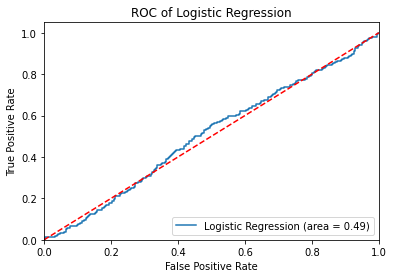

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 2. LightGBM (no hyperparam tuning)

In [16]:
pip install lightgbm

In [17]:
from lightgbm import LGBMClassifier 

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
lgbm = LGBMClassifier()

In [20]:
lgbm.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
y_preds=lgbm.predict(X_test)
cr = classification_report(Y_test,y_preds)
print(cr)

              precision    recall  f1-score   support

          -1       0.56      0.99      0.71      2100
           1       0.55      0.01      0.02      1680

    accuracy                           0.56      3780
   macro avg       0.55      0.50      0.37      3780
weighted avg       0.55      0.56      0.40      3780



In [22]:
confusion_matrix(Y_test,y_preds)

array([[2087,   13],
       [1664,   16]])

#LightGBM after Hyperparam Tuning

In [23]:
pip install scikit-learn

In [24]:
pip install optuna

     |████████████████████████████████| 308 kB 7.1 MB/s 
     |████████████████████████████████| 209 kB 69.3 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 75 kB 5.3 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 144 kB 60.2 MB/s 
     |████████████████████████████████| 111 kB 73.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=acef942212fac2dc720e8bba96aaaa08cb45f4e5ff4b8449bcbf77edbf18126d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [25]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
# from a import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [26]:
def objective(trial) -> float:
    
    # joblib.dump(study, 'study.pkl')
    
    # train_X,test_X,train_y,test_y = train_test_split(X, Y, test_size = 0.30,random_state = 101)
    # dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    
    lgbm = LGBMClassifier(**param)
    lgbm.fit(X_train,Y_train)
    preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
    accuracy = accuracy_score(Y_test, preds)
    return accuracy
    

In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-10-18 04:34:40,617] A new study created in memory with name: no-name-97fb66d7-3753-4ae0-ae85-1b8ae6cd5a8f
[I 2021-10-18 04:34:53,911] Trial 0 finished with value: 0.5515873015873016 and parameters: {'lambda_l1': 0.00015887005846255164, 'lambda_l2': 1.3230934937414535e-07, 'num_leaves': 236, 'feature_fraction': 0.8295439499600543, 'bagging_fraction': 0.48316830737935973, 'bagging_freq': 1, 'min_child_samples': 50}. Best is trial 0 with value: 0.5515873015873016.
[I 2021-10-18 04:35:06,762] Trial 1 finished with value: 0.553968253968254 and parameters: {'lambda_l1': 2.6419601815754596, 'lambda_l2': 1.0793469484400823e-07, 'num_leaves': 230, 'feature_fraction': 0.7899679313133157, 'bagging_fraction': 0.936380709182436, 'bagging_freq': 1, 'min_child_samples': 57}. Best is trial 1 with value: 0.553968253968254.
[I 2021-10-18 04:35:13,906] Trial 2 finished with value: 0.5523809523809524 and parameters: {'lambda_l1': 6.054449887930072, 'lambda_l2': 0.0032048522532621354, 'num_leaves':

In [28]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 50
Best trial: {'lambda_l1': 1.9031770127034067e-06, 'lambda_l2': 0.0064377616241892525, 'num_leaves': 144, 'feature_fraction': 0.5680284824978308, 'bagging_fraction': 0.6077747162276732, 'bagging_freq': 1, 'min_child_samples': 77}


In [29]:
best_params=study.best_trial.params

In [30]:
best_params, tuning_history = dict(), list()
# booster = lgbm.train(params, dtrain, valid_sets=dval,
#                     verbose_eval=0,
#                     best_params=best_params,
#                     tuning_history=tuning_history)
 
print( best_params)
print( tuning_history)

{}
[]


In [31]:
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [32]:
y_train_preds = lgbm.predict(X_train)
cls1 = classification_report(Y_train,y_train_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_train,y_train_preds)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3150
           1       1.00      1.00      1.00      2520

    accuracy                           1.00      5670
   macro avg       1.00      1.00      1.00      5670
weighted avg       1.00      1.00      1.00      5670

------------COnfusion Matrix---------------


array([[3150,    0],
       [   0, 2520]])

In [33]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(Y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_test,y_preds)


              precision    recall  f1-score   support

          -1       0.56      0.99      0.71      2100
           1       0.55      0.01      0.02      1680

    accuracy                           0.56      3780
   macro avg       0.55      0.50      0.37      3780
weighted avg       0.55      0.56      0.40      3780

------------COnfusion Matrix---------------


array([[2087,   13],
       [1664,   16]])

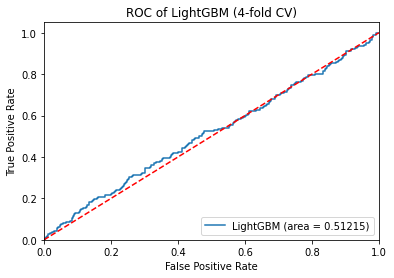

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict the probability of our label score
Y_pred_proba = lgbm.predict_proba(X_test)

r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LightGBM (area = %0.5f)' % r_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LightGBM (4-fold CV)')
plt.legend(loc="lower right")
# plt.savefig('images2/Randomforest_ROC')
plt.show()

In [35]:
optuna.visualization.plot_param_importances(study)

#Now using AUC score as "Check" while training

In [36]:
from sklearn.metrics import f1_score
def objective(trial) -> float:
    
    # joblib.dump(study, 'study.pkl')
    
    # train_X,test_X,train_y,test_y = train_test_split(X, Y, test_size = 0.30,random_state = 101)
    # dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    
    lgbm = LGBMClassifier(**param,n_jobs=-1)
    lgbm.fit(X_train,Y_train)
    preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
    # Y_pred_proba = lgbm.predict_proba(X_test)
    # r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
    f1 = f1_score(Y_test, preds, average=None,pos_label=1)
    print(f1)
    return f1[1]
    

In [37]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-10-18 04:46:50,613] A new study created in memory with name: no-name-e7be4d4f-9880-4473-bafa-b96c283ab6d3
[I 2021-10-18 04:46:57,080] Trial 0 finished with value: 0.061247216035634745 and parameters: {'lambda_l1': 2.3397878340737162e-07, 'lambda_l2': 1.6268884099563476e-08, 'num_leaves': 237, 'feature_fraction': 0.5330347801566696, 'bagging_fraction': 0.41004676090769276, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 0 with value: 0.061247216035634745.


[0.7074948  0.06124722]


[I 2021-10-18 04:47:09,864] Trial 1 finished with value: 0.0 and parameters: {'lambda_l1': 7.67956025109041e-06, 'lambda_l2': 5.389521077116579e-05, 'num_leaves': 194, 'feature_fraction': 0.44875727133747123, 'bagging_fraction': 0.981260299080799, 'bagging_freq': 3, 'min_child_samples': 60}. Best is trial 0 with value: 0.061247216035634745.


[0.7136294 0.       ]


[I 2021-10-18 04:47:21,925] Trial 2 finished with value: 0.020930232558139535 and parameters: {'lambda_l1': 0.05661883996411063, 'lambda_l2': 0.013530146181512446, 'num_leaves': 252, 'feature_fraction': 0.8579266720501726, 'bagging_fraction': 0.6851977490084302, 'bagging_freq': 2, 'min_child_samples': 86}. Best is trial 0 with value: 0.061247216035634745.


[0.71164384 0.02093023]


[I 2021-10-18 04:47:42,299] Trial 3 finished with value: 0.0 and parameters: {'lambda_l1': 0.24749240848046536, 'lambda_l2': 1.873403442356211e-05, 'num_leaves': 231, 'feature_fraction': 0.6266258071152475, 'bagging_fraction': 0.9727704456365492, 'bagging_freq': 4, 'min_child_samples': 31}. Best is trial 0 with value: 0.061247216035634745.


[0.71406702 0.        ]


[I 2021-10-18 04:47:56,295] Trial 4 finished with value: 0.043981481481481476 and parameters: {'lambda_l1': 0.6144095308500627, 'lambda_l2': 7.154290037355715e-08, 'num_leaves': 37, 'feature_fraction': 0.6329624912001163, 'bagging_fraction': 0.649301037553904, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 0 with value: 0.061247216035634745.


[0.71673525 0.04398148]


[I 2021-10-18 04:48:02,434] Trial 5 finished with value: 0.07684098185699038 and parameters: {'lambda_l1': 3.114256852292251e-05, 'lambda_l2': 0.008067002769585102, 'num_leaves': 192, 'feature_fraction': 0.769883175582603, 'bagging_fraction': 0.40984430977561126, 'bagging_freq': 7, 'min_child_samples': 99}. Best is trial 5 with value: 0.07684098185699038.


[0.69574393 0.07684098]


[I 2021-10-18 04:48:09,566] Trial 6 finished with value: 0.0842911877394636 and parameters: {'lambda_l1': 1.5641181332750256, 'lambda_l2': 0.5146764548621211, 'num_leaves': 118, 'feature_fraction': 0.8568401074277795, 'bagging_fraction': 0.46334752495268655, 'bagging_freq': 4, 'min_child_samples': 85}. Best is trial 6 with value: 0.0842911877394636.


[0.70818071 0.08429119]


[I 2021-10-18 04:48:40,455] Trial 7 finished with value: 0.0 and parameters: {'lambda_l1': 0.008003355213863106, 'lambda_l2': 0.0511035382129977, 'num_leaves': 94, 'feature_fraction': 0.6974267957406408, 'bagging_fraction': 0.9190507581842511, 'bagging_freq': 6, 'min_child_samples': 21}. Best is trial 6 with value: 0.0842911877394636.


[0.71428571 0.        ]


[I 2021-10-18 04:48:49,145] Trial 8 finished with value: 0.008149010477299184 and parameters: {'lambda_l1': 0.00034420621700811965, 'lambda_l2': 0.07119399227751305, 'num_leaves': 172, 'feature_fraction': 0.7247311346953891, 'bagging_fraction': 0.6305157534041768, 'bagging_freq': 7, 'min_child_samples': 96}. Best is trial 6 with value: 0.0842911877394636.


[0.70831907 0.00814901]


[I 2021-10-18 04:49:11,225] Trial 9 finished with value: 0.0 and parameters: {'lambda_l1': 2.774098506890754e-05, 'lambda_l2': 2.180350820726893e-06, 'num_leaves': 178, 'feature_fraction': 0.5996118042920618, 'bagging_fraction': 0.728269400938472, 'bagging_freq': 3, 'min_child_samples': 32}. Best is trial 6 with value: 0.0842911877394636.


[0.71428571 0.        ]


[I 2021-10-18 04:49:18,982] Trial 10 finished with value: 0.049189491335941866 and parameters: {'lambda_l1': 9.382484523833176, 'lambda_l2': 9.585219318131115, 'num_leaves': 100, 'feature_fraction': 0.994792958091651, 'bagging_fraction': 0.5361722265144063, 'bagging_freq': 1, 'min_child_samples': 77}. Best is trial 6 with value: 0.0842911877394636.


[0.70525039 0.04918949]


[I 2021-10-18 04:49:24,716] Trial 11 finished with value: 0.07101218865924748 and parameters: {'lambda_l1': 1.115341097265175e-08, 'lambda_l2': 7.817337166907344, 'num_leaves': 125, 'feature_fraction': 0.8374354873224438, 'bagging_fraction': 0.4005946754595076, 'bagging_freq': 5, 'min_child_samples': 99}. Best is trial 6 with value: 0.0842911877394636.


[0.69099242 0.07101219]


[I 2021-10-18 04:49:33,845] Trial 12 finished with value: 0.03214695752009185 and parameters: {'lambda_l1': 0.0003671836264471309, 'lambda_l2': 0.0011148511850044916, 'num_leaves': 48, 'feature_fraction': 0.8370539352378407, 'bagging_fraction': 0.49037005314846893, 'bagging_freq': 4, 'min_child_samples': 77}. Best is trial 6 with value: 0.0842911877394636.


[0.71020969 0.03214696]


[I 2021-10-18 04:49:48,586] Trial 13 finished with value: 0.01639344262295082 and parameters: {'lambda_l1': 0.003133613855399604, 'lambda_l2': 0.851554244923022, 'num_leaves': 151, 'feature_fraction': 0.9508355017168502, 'bagging_fraction': 0.5353200323302998, 'bagging_freq': 7, 'min_child_samples': 50}. Best is trial 6 with value: 0.0842911877394636.


[0.71291866 0.01639344]


[I 2021-10-18 04:50:00,826] Trial 14 finished with value: 0.015258215962441316 and parameters: {'lambda_l1': 1.0482299126764063e-06, 'lambda_l2': 0.002163922096818307, 'num_leaves': 76, 'feature_fraction': 0.7621977740590212, 'bagging_fraction': 0.8121070095948976, 'bagging_freq': 5, 'min_child_samples': 86}. Best is trial 6 with value: 0.0842911877394636.


[0.71345628 0.01525822]


[I 2021-10-18 04:50:36,274] Trial 15 finished with value: 0.0 and parameters: {'lambda_l1': 3.6091734425221644e-05, 'lambda_l2': 0.5150555346658086, 'num_leaves': 209, 'feature_fraction': 0.9105664427862347, 'bagging_fraction': 0.46774330521039925, 'bagging_freq': 3, 'min_child_samples': 7}. Best is trial 6 with value: 0.0842911877394636.


[0.71406702 0.        ]


[I 2021-10-18 04:50:39,084] Trial 16 finished with value: 0.2739018087855297 and parameters: {'lambda_l1': 3.457516362950691, 'lambda_l2': 0.0075052857130709074, 'num_leaves': 4, 'feature_fraction': 0.786311436709316, 'bagging_fraction': 0.6000802569351765, 'bagging_freq': 5, 'min_child_samples': 90}. Best is trial 16 with value: 0.2739018087855297.


[0.67812142 0.27390181]


[I 2021-10-18 04:50:47,730] Trial 17 finished with value: 0.07493112947658404 and parameters: {'lambda_l1': 4.011854468144273, 'lambda_l2': 0.00014886518939657953, 'num_leaves': 17, 'feature_fraction': 0.8983948335769647, 'bagging_fraction': 0.5880490489814323, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 16 with value: 0.2739018087855297.


[0.70774587 0.07493113]


[I 2021-10-18 04:50:53,201] Trial 18 finished with value: 0.16765873015873017 and parameters: {'lambda_l1': 0.7311323266697904, 'lambda_l2': 0.6698008793674278, 'num_leaves': 9, 'feature_fraction': 0.812919367830867, 'bagging_fraction': 0.7638948197857669, 'bagging_freq': 4, 'min_child_samples': 68}. Best is trial 16 with value: 0.2739018087855297.


[0.69733045 0.16765873]


[I 2021-10-18 04:50:56,686] Trial 19 finished with value: 0.2154267457781835 and parameters: {'lambda_l1': 0.0429774328831914, 'lambda_l2': 3.783344270786796e-06, 'num_leaves': 5, 'feature_fraction': 0.7731903384681013, 'bagging_fraction': 0.7822897809626104, 'bagging_freq': 2, 'min_child_samples': 64}. Best is trial 16 with value: 0.2739018087855297.


[0.67982865 0.21542675]


[I 2021-10-18 04:51:14,357] Trial 20 finished with value: 0.0 and parameters: {'lambda_l1': 0.04728538995084642, 'lambda_l2': 1.1807698776948254e-06, 'num_leaves': 53, 'feature_fraction': 0.6851497746748852, 'bagging_fraction': 0.838107479147379, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 16 with value: 0.2739018087855297.


[0.71319149 0.        ]


[I 2021-10-18 04:51:16,950] Trial 21 finished with value: 0.26870748299319724 and parameters: {'lambda_l1': 0.1583113752422997, 'lambda_l2': 5.4833170823124954e-06, 'num_leaves': 3, 'feature_fraction': 0.7850514990432569, 'bagging_fraction': 0.8040258810137774, 'bagging_freq': 2, 'min_child_samples': 65}. Best is trial 16 with value: 0.2739018087855297.


[0.66973886 0.26870748]


[I 2021-10-18 04:51:20,558] Trial 22 finished with value: 0.29016890428757036 and parameters: {'lambda_l1': 0.06971029619890672, 'lambda_l2': 4.441873324818658e-06, 'num_leaves': 5, 'feature_fraction': 0.779844363518546, 'bagging_fraction': 0.8748994655816233, 'bagging_freq': 2, 'min_child_samples': 73}. Best is trial 22 with value: 0.29016890428757036.


[0.68786898 0.2901689 ]


[I 2021-10-18 04:51:32,262] Trial 23 finished with value: 0.010501750291715286 and parameters: {'lambda_l1': 0.0033557425079619153, 'lambda_l2': 3.0671487850932317e-07, 'num_leaves': 30, 'feature_fraction': 0.7373272719853903, 'bagging_fraction': 0.8806797449087822, 'bagging_freq': 2, 'min_child_samples': 75}. Best is trial 22 with value: 0.29016890428757036.


[0.7098871  0.01050175]


[I 2021-10-18 04:51:48,507] Trial 24 finished with value: 0.007109004739336493 and parameters: {'lambda_l1': 0.18035399898031823, 'lambda_l2': 1.3225171989845515e-05, 'num_leaves': 73, 'feature_fraction': 0.6822061229700491, 'bagging_fraction': 0.8828056697005421, 'bagging_freq': 1, 'min_child_samples': 56}. Best is trial 22 with value: 0.29016890428757036.


[0.71457766 0.007109  ]


[I 2021-10-18 04:51:58,213] Trial 25 finished with value: 0.015098722415795589 and parameters: {'lambda_l1': 0.016328470345938404, 'lambda_l2': 0.0003461208875224996, 'num_leaves': 24, 'feature_fraction': 0.802073776382543, 'bagging_fraction': 0.6947609017052915, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 22 with value: 0.29016890428757036.


[0.70948955 0.01509872]


[I 2021-10-18 04:52:09,190] Trial 26 finished with value: 0.0346420323325635 and parameters: {'lambda_l1': 2.004742103386162, 'lambda_l2': 4.409202692952027e-07, 'num_leaves': 66, 'feature_fraction': 0.9024631589766583, 'bagging_fraction': 0.7470907434379577, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 22 with value: 0.29016890428757036.


[0.71310913 0.03464203]


[I 2021-10-18 04:52:11,760] Trial 27 finished with value: 0.2885615251299827 and parameters: {'lambda_l1': 0.23397980392966652, 'lambda_l2': 1.3348577941352231e-05, 'num_leaves': 4, 'feature_fraction': 0.5651589532760306, 'bagging_fraction': 0.8499294190652233, 'bagging_freq': 2, 'min_child_samples': 70}. Best is trial 22 with value: 0.29016890428757036.


[0.6873572  0.28856153]


[I 2021-10-18 04:52:18,461] Trial 28 finished with value: 0.009400705052878967 and parameters: {'lambda_l1': 7.547194905025854, 'lambda_l2': 9.00121259760702e-05, 'num_leaves': 50, 'feature_fraction': 0.524159185795825, 'bagging_fraction': 0.8485272692494165, 'bagging_freq': 1, 'min_child_samples': 72}. Best is trial 22 with value: 0.29016890428757036.


[0.71218846 0.00940071]


[I 2021-10-18 04:52:27,016] Trial 29 finished with value: 0.007025761124121781 and parameters: {'lambda_l1': 0.0007697041151887983, 'lambda_l2': 1.157389561870511e-08, 'num_leaves': 34, 'feature_fraction': 0.5219527281587557, 'bagging_fraction': 0.8940759381203189, 'bagging_freq': 5, 'min_child_samples': 92}. Best is trial 22 with value: 0.29016890428757036.


[0.71018455 0.00702576]


[I 2021-10-18 04:52:40,198] Trial 30 finished with value: 0.007113218731475993 and parameters: {'lambda_l1': 0.41012081947841206, 'lambda_l2': 9.95855992797974e-08, 'num_leaves': 89, 'feature_fraction': 0.5814590866003234, 'bagging_fraction': 0.9452422851741291, 'bagging_freq': 3, 'min_child_samples': 57}. Best is trial 22 with value: 0.29016890428757036.


[0.71479653 0.00711322]


[I 2021-10-18 04:52:42,855] Trial 31 finished with value: 0.2926421404682274 and parameters: {'lambda_l1': 0.10452611757716387, 'lambda_l2': 1.0203022767871227e-05, 'num_leaves': 3, 'feature_fraction': 0.4084481965792991, 'bagging_fraction': 0.8038622019020951, 'bagging_freq': 2, 'min_child_samples': 67}. Best is trial 31 with value: 0.2926421404682274.


[0.67260062 0.29264214]


[I 2021-10-18 04:52:48,021] Trial 32 finished with value: 0.056761268781302165 and parameters: {'lambda_l1': 0.01544047351183219, 'lambda_l2': 2.6852705877586884e-05, 'num_leaves': 18, 'feature_fraction': 0.40096061400948346, 'bagging_fraction': 0.8235847662829294, 'bagging_freq': 2, 'min_child_samples': 70}. Best is trial 31 with value: 0.2926421404682274.


[0.70588235 0.05676127]


[I 2021-10-18 04:52:50,281] Trial 33 finished with value: 0.24178712220762158 and parameters: {'lambda_l1': 1.5768571361480512, 'lambda_l2': 0.0004056108655846177, 'num_leaves': 2, 'feature_fraction': 0.47732256807606727, 'bagging_fraction': 0.9980249965396297, 'bagging_freq': 3, 'min_child_samples': 80}. Best is trial 31 with value: 0.2926421404682274.


[0.67197271 0.24178712]


[I 2021-10-18 04:52:58,366] Trial 34 finished with value: 0.0139778683750728 and parameters: {'lambda_l1': 0.09667311958385759, 'lambda_l2': 3.907127876442613e-05, 'num_leaves': 34, 'feature_fraction': 0.40747919694630874, 'bagging_fraction': 0.8636198328760087, 'bagging_freq': 2, 'min_child_samples': 63}. Best is trial 31 with value: 0.2926421404682274.


[0.71025158 0.01397787]


[I 2021-10-18 04:53:05,421] Trial 35 finished with value: 0.01054481546572935 and parameters: {'lambda_l1': 0.0019750613792631298, 'lambda_l2': 1.1262561785357817e-05, 'num_leaves': 59, 'feature_fraction': 0.44749305443351683, 'bagging_fraction': 0.6687215677457726, 'bagging_freq': 1, 'min_child_samples': 85}. Best is trial 31 with value: 0.2926421404682274.


[0.71143004 0.01054482]


[I 2021-10-18 04:53:13,210] Trial 36 finished with value: 0.037564029595902104 and parameters: {'lambda_l1': 0.5009201344078996, 'lambda_l2': 0.003241420685051541, 'num_leaves': 20, 'feature_fraction': 0.6571318565187988, 'bagging_fraction': 0.6103920436064024, 'bagging_freq': 6, 'min_child_samples': 59}. Best is trial 31 with value: 0.2926421404682274.


[0.708599   0.03756403]


[I 2021-10-18 04:53:24,742] Trial 37 finished with value: 0.002369668246445498 and parameters: {'lambda_l1': 0.05228876911039863, 'lambda_l2': 5.928369519429061e-07, 'num_leaves': 44, 'feature_fraction': 0.5759128031507638, 'bagging_fraction': 0.9462082426165747, 'bagging_freq': 2, 'min_child_samples': 82}. Best is trial 31 with value: 0.2926421404682274.


[0.71321526 0.00236967]


[I 2021-10-18 04:53:32,192] Trial 38 finished with value: 0.049058756417569876 and parameters: {'lambda_l1': 2.3416855415976188, 'lambda_l2': 4.7901056668514895e-08, 'num_leaves': 23, 'feature_fraction': 0.48599940770837147, 'bagging_fraction': 0.9271165405678309, 'bagging_freq': 4, 'min_child_samples': 50}. Best is trial 31 with value: 0.2926421404682274.


[0.71293267 0.04905876]


[I 2021-10-18 04:53:42,627] Trial 39 finished with value: 0.021003500583430573 and parameters: {'lambda_l1': 0.013062379617426323, 'lambda_l2': 0.023072299648180517, 'num_leaves': 36, 'feature_fraction': 0.7300907377274147, 'bagging_fraction': 0.7228891299313551, 'bagging_freq': 3, 'min_child_samples': 91}. Best is trial 31 with value: 0.2926421404682274.


[0.71296613 0.0210035 ]


[I 2021-10-18 04:53:48,158] Trial 40 finished with value: 0.1189860320744956 and parameters: {'lambda_l1': 0.8037398303384062, 'lambda_l2': 8.894197835648724e-05, 'num_leaves': 12, 'feature_fraction': 0.6393726537577425, 'bagging_fraction': 0.7811588008498711, 'bagging_freq': 4, 'min_child_samples': 72}. Best is trial 31 with value: 0.2926421404682274.


[0.69735205 0.11898603]


[I 2021-10-18 04:53:50,555] Trial 41 finished with value: 0.2720070422535211 and parameters: {'lambda_l1': 0.11383507684831953, 'lambda_l2': 6.880157733735436e-06, 'num_leaves': 2, 'feature_fraction': 0.7896796230660462, 'bagging_fraction': 0.7925192944237632, 'bagging_freq': 2, 'min_child_samples': 68}. Best is trial 31 with value: 0.2926421404682274.


[0.68721634 0.27200704]


[I 2021-10-18 04:53:58,387] Trial 42 finished with value: 0.0606060606060606 and parameters: {'lambda_l1': 0.16214734377416895, 'lambda_l2': 6.7208432735184806e-06, 'num_leaves': 16, 'feature_fraction': 0.7475781909990713, 'bagging_fraction': 0.79003438120815, 'bagging_freq': 2, 'min_child_samples': 66}. Best is trial 31 with value: 0.2926421404682274.


[0.71028037 0.06060606]


[I 2021-10-18 04:54:00,419] Trial 43 finished with value: 0.28331936295054483 and parameters: {'lambda_l1': 0.029915075063283298, 'lambda_l2': 1.299565108246056e-06, 'num_leaves': 2, 'feature_fraction': 0.8162116031856792, 'bagging_fraction': 0.7198643387948601, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 31 with value: 0.2926421404682274.


[0.66950135 0.28331936]


[I 2021-10-18 04:54:14,909] Trial 44 finished with value: 0.004730928444707274 and parameters: {'lambda_l1': 0.037159271670224, 'lambda_l2': 1.7937804777417795e-06, 'num_leaves': 42, 'feature_fraction': 0.874308967950345, 'bagging_fraction': 0.7175944773112002, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 31 with value: 0.2926421404682274.


[0.71323905 0.00473093]


[I 2021-10-18 04:54:26,594] Trial 45 finished with value: 0.015142690739662202 and parameters: {'lambda_l1': 0.33144089548533034, 'lambda_l2': 1.3544648778548467e-07, 'num_leaves': 241, 'feature_fraction': 0.8252429704035572, 'bagging_fraction': 0.6557113510854364, 'bagging_freq': 1, 'min_child_samples': 81}. Best is trial 31 with value: 0.2926421404682274.


[0.71059387 0.01514269]


[I 2021-10-18 04:54:36,617] Trial 46 finished with value: 0.010416666666666664 and parameters: {'lambda_l1': 0.0060981017227580364, 'lambda_l2': 1.2146370214867343e-06, 'num_leaves': 26, 'feature_fraction': 0.8646854418109067, 'bagging_fraction': 0.5976553428904948, 'bagging_freq': 1, 'min_child_samples': 95}. Best is trial 31 with value: 0.2926421404682274.


[0.70679012 0.01041667]


[I 2021-10-18 04:54:48,222] Trial 47 finished with value: 0.029036004645760748 and parameters: {'lambda_l1': 0.0012501965542028883, 'lambda_l2': 0.0010183969918360985, 'num_leaves': 111, 'feature_fraction': 0.7104857248524623, 'bagging_fraction': 0.5460619934088983, 'bagging_freq': 6, 'min_child_samples': 54}. Best is trial 31 with value: 0.2926421404682274.


[0.71360055 0.029036  ]


[I 2021-10-18 04:54:53,486] Trial 48 finished with value: 0.10337552742616034 and parameters: {'lambda_l1': 5.5331229382508536, 'lambda_l2': 0.1134300439086009, 'num_leaves': 12, 'feature_fraction': 0.6082464478943425, 'bagging_fraction': 0.739774557288586, 'bagging_freq': 5, 'min_child_samples': 62}. Best is trial 31 with value: 0.2926421404682274.


[0.69985876 0.10337553]


[I 2021-10-18 04:55:01,267] Trial 49 finished with value: 0.01521357519016969 and parameters: {'lambda_l1': 8.162856383616687e-05, 'lambda_l2': 2.043508598832799e-05, 'num_leaves': 58, 'feature_fraction': 0.5486677332459335, 'bagging_fraction': 0.6889673300941572, 'bagging_freq': 3, 'min_child_samples': 88}. Best is trial 31 with value: 0.2926421404682274.


[0.71235686 0.01521358]


In [38]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 50
Best trial: {'lambda_l1': 0.10452611757716387, 'lambda_l2': 1.0203022767871227e-05, 'num_leaves': 3, 'feature_fraction': 0.4084481965792991, 'bagging_fraction': 0.8038622019020951, 'bagging_freq': 2, 'min_child_samples': 67}


In [39]:
# best_params={'lambda_l1': 0.06770730346819898, 'lambda_l2': 0.022431428511784306, 'num_leaves': 94, 'feature_fraction': 0.8751672826088824, 'bagging_fraction': 0.6485349829513737, 'bagging_freq': 4, 'min_child_samples': 79}

In [40]:
best_params, tuning_history = dict(), list()
# booster = lgbm.train(params, dtrain, valid_sets=dval,
#                     verbose_eval=0,
#                     best_params=best_params,
#                     tuning_history=tuning_history)
 
print( best_params)
print( tuning_history)

{}
[]


In [41]:
best_params=study.best_trial.params

In [42]:
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train,Y_train)

LGBMClassifier(bagging_fraction=0.8038622019020951, bagging_freq=2,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.4084481965792991, importance_type='split',
               lambda_l1=0.10452611757716387, lambda_l2=1.0203022767871227e-05,
               learning_rate=0.1, max_depth=-1, min_child_samples=67,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=3, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [43]:
X_train.shape,Y_train.shape

((5670, 868), (5670,))

In [44]:
y_train_preds = lgbm.predict(X_train)
cls1 = classification_report(Y_train,y_train_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_train,y_train_preds)

              precision    recall  f1-score   support

          -1       0.75      0.90      0.82      3150
           1       0.84      0.63      0.72      2520

    accuracy                           0.78      5670
   macro avg       0.80      0.77      0.77      5670
weighted avg       0.79      0.78      0.78      5670

------------COnfusion Matrix---------------


array([[2843,  307],
       [ 928, 1592]])

In [45]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(Y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_test,y_preds)


              precision    recall  f1-score   support

          -1       0.57      0.83      0.67      2100
           1       0.49      0.21      0.29      1680

    accuracy                           0.55      3780
   macro avg       0.53      0.52      0.48      3780
weighted avg       0.53      0.55      0.50      3780

------------COnfusion Matrix---------------


array([[1738,  362],
       [1330,  350]])

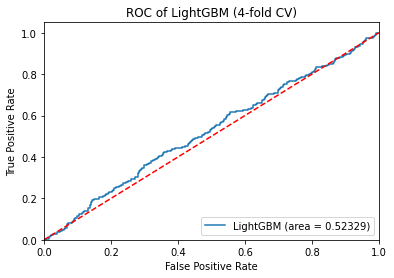

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict the probability of our label score
Y_pred_proba = lgbm.predict_proba(X_test)

r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LightGBM (area = %0.5f)' % r_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LightGBM (4-fold CV)')
plt.legend(loc="lower right")
# plt.savefig('images2/Randomforest_ROC')
plt.show()

In [47]:
optuna.visualization.plot_param_importances(study)